### Krav för godkänt (G)
- Skapa en modell från grunden. Du ansvarar själv för städning av datan och uppdelning i träning, validering och testning.

**Frågor:**

- **Motivera din modell, dess arkitektur och val av relevanta hyperparametrar.**

Tested LSTM as first RNN layer. worked pretty well, and not too many parameters after adding LSTM with 512 nodes (1.2m). It's also worth noting that I'm using the same setup for the embedding layer as I did for the RNN labb. However, I've changed the variables abit to fit this dataset better. I'm also properly trying Earlystopping for this model (which I haven't done before), this is because I want to save time and also get the best model that is possible:

```py
    model.add(layers.LSTM(512, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
```

**Parameters:** 1.25M
- Val Accuracy: 0.9589
- Test Accuracy: 0.6482
- Val Loss: 0.4868
- Test Loss: 0.6931

I also wanted to check if the same tactic that I used for labb 2, would work here aswell. Therefor I added conv1d layer and max pooling aswell as an FC layer:

```py
    model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(layers.MaxPool1D(5))
    model.add(layers.LSTM(512, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
```

**Parameters:** 1.29M
- Val Accuracy: 0.9661
- Test Accuracy: 0.9607
- Val Loss: 0.5187
- Test Loss: 0.4382

Just because I was curious, I added a second LSTM layer, aswell as an FC layer. I also increased the node count. I wanted to see if just adding more would easily get the model to ~99% val and test accuracy:

```py
    model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(layers.MaxPool1D(5))
    model.add(layers.LSTM(1024, activation='relu', return_sequences=True))
    model.add(layers.LSTM(512, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
```

**Parameters:** 8.25M 
- Val Accuracy: 0.9500
- Test Accuracy: 0.9375
- Val Loss: 0.1843
- Test Loss: 0.1994

Obviously, this didn't work well, not only increased parameters by almost a factor 8, but test and val accuracy also went down. I removed second LSTM layer and also decreased the amount of nodes for each layer, which seemed to help: 

**Parameters:** 510K
- Val Accuracy: 0.9661
- Test Accuracy: 0.9661
- Val Loss: 0.1755
- Test Loss: 0.1302

```py
    model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(layers.MaxPool1D(5))
    model.add(layers.LSTM(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))

```

Right now, Early stopping is down to epoch 5, which seems abit low. I want to see if i can extened training for a couple more epochs by adding regularization:

**Parameters:** 580K
- Val Accuracy: 0.9518
- Test Accuracy: 0.9643
- Val Loss: 0.2633
- Test Loss: 0.1903

```py
    model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(layers.MaxPool1D(5))
    model.add(layers.LSTM(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="sigmoid"))
```

This did not seem to do much outside of extending the Early stopping by 1 epoch. I tested different combinations of Dropout and L2, aswell as different values. However, this did not seem to help in any way. At this point I'm quite happy with how the model is performing, and since our second models task is quite close to our first model, with the difference being the output. I'm using the same architecture, but changing output nodes and its AF to softmax since it's a multi-classification model. I'm also changing the loss function to sparse_categorical_crossentropy for this reason. Everything else stays the same, and the model looks like this: 

```py
    model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(layers.MaxPool1D(5))
    model.add(layers.LSTM(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation="softmax"))
```

- **Har du använt någon databehandling? Varför?**
  - I've removed punctuation, changed the text that has numbers in words (ex: 4sshole -> asshole), removed the rows with text that has randomly spaced words (ex: I really l i k e icecream), found misspellings that seem random (haven't spent too much time on this). I couldn't find a simple way to fix the misspellings, perhaps there is a module or something that helps with this. If I had more time, then I'd look into fixing the spacing and misspellings to increase the quality of the data.
- **Utvärdera modellens prestanda.**
  - I'm basically using the same model twice for each problem. This is beacuse it performed very well (in my opinion) on both problems (around 95% val and test acc), and if it works well from the get-go, and is relatively lightweight. Why fix something that isn't broken? Saving time to focus on fixing the issues in the dataset seems like a better choice to me. 
- **Är prestandan bra? Varför/ varför inte?**
  - The performance of both models are very similar, which makes sense since they're using the same dataset, but different target columns. Having ran both models multiple times the test and val accuracy are about 95-96%, which is good. I have also implemented your critique from labb 2 about doing data augmentation after the data split so as not to leak data. 
- **Vad hade du kunnat göra för att förbättra den ytterligare?**

### Krav för väl godkänt (VG)
- För VG ska du utvärdera modellen noggrannare och systematiskt optimera hyperparametrar.

**Frågor:**

- **Testa olika hyperparametrar systematiskt.**
  - I've used Hyperband on both models in order to figure out what hyperparameters to go with. I've focused abit more on what combination of AF is best for each model, but I also have different dropout values and node amount for the layers. Even though the models are basically the same, the two models chose different hyperparameters as their best, which is interesting. 

- **Vilken typ av fel gör modellen? Gör den fel på vissa klasser? Gör den fel specifik typ av data? Annat?**
  - The binary model is predicting incorrectly whether something is hateful or not. While overall the model works pretty well, it's still most of the time choosing to guess a text as hateful. This does however make sense since the amount of hateful vs non-hateful texts differ by quite alot. This would obviously mean that the model is more "sure" of categorizing hateful texts. It's also worth noting that the model actually predicts incorrectly in a balanced way too, however, it's still prone to become unbalanced if you re-run all the code, just not 100% sure that it'll happen.
  - The multi-classification is abit more unclear and inconsistent. What it predicts incorrectly can differ for each time you run the model, but the recurring predictions are the ones with the 'none' identity (5). Just like the binary model, this makes sense I would say. The dataset has about half the amount of 'none' data in the dataset compared to the other identities. I had originally assumed that if the model did very well with predicting the identities, it would also do well for the 'none' category, which it still kind of is. However, there is improvements that could be made here, and I think that just adding more data to balance out the identites would most likely fix this issue, but I'm not 100% certain about this.
  - Having re-run the model about 5 times, I cannot find another pattern which is recurring, the incorrect predictions for other identities (that aren't 'none') really seems random to me.

- **Kan du göra något för att hantera vanliga fel modellen gör? (Med den data du har, att träna på mer data är inte ett godkänt svar)**
  - I would say that increasing the amount of data augmentation (not just translate augmentation which I have now), this would also include more processing to have more data to augment on. I would also spend more time on the architecture, increasing the complexity abit more (which I think I can afford since the models are relatively lightweight and train quickly at the moment). I would also look into adjusting the class weights (which I haven't tested before), this might actually nullify the steps I've just mentioned, and could be a powerful tool if done correctly. Another tool that I could look into would be resampling to balance out the unbalanced classes, and it would be interesting to see how the models would react differently based on if the dataset had been balanced out through data augmentation compared with being balanced out with with resampling (or perhaps a mixture of both).

- **Finns det några begränsningar med modellen?**
  - The main issue I see with this dataset is how explicit you'd have to be in order to be categorized as hateful against an identity. Infact, you can be quite hateful person without swearing or mentioned a specific identity explicitly in the text. I would like to have more data from both hateful forums and also from sources like debates between differing groups. The primary objective is to enhance the detection of dog-whistling. This term refers to the act of subtly communicating a specific message to a group without outright expressing offensive content. An example, often encountered in debates, involves discussing the atrocities committed by Nazis in concentration camps. Instead of directly mentioning the number of people killed in the camps, individuals might use coded language, like referring to "cookies in the oven." Such references would almost for sure not be picked up by the models currently.

### Min valda uppgift - Motverka hatretorik

Denna uppgift innehåller hatiska texter riktad mot flera olika grupper och kan därmed vara jobbig för
vissa att genomföra.

På sociala medier och forum skrivs idag mycket hatiska texter, bpde mot personer och grupper. Oftast
bevakas sociala medier och forum av moderatorer, men det är ett tidskrävande arbete och hat sprids
snabbare än vad de hinner jobba. Genom att ha en modell som kan idetifiera denna typ av text så kan vi snabba på moderatorerna arbete och minska att hat sprids.

**Uppgift:** Skapa en modell som kan identifiera om en text är hatisk mot en specifik grupp (och vilken grupp). Det är några typer av hat som ligger i fokus, exempelvis hat baserat å sexalitet eller kön. 

Hat mot exempelvis en yrkesgrupp räknas inte som en hatisk text. 

Dataset: ca 4000 texter, om den är hatisk och i så fall mot vilken grupp.

In [446]:
import pandas as pd
import numpy as np
from labb_2_functions import *
from spellchecker import SpellChecker
import string
from googletrans import Translator
import random
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Activation,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    Rescaling,
    GlobalAveragePooling2D
)
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import itertools
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras import Sequential, layers, regularizers
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import kerastuner as kt
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

pd.set_option('display.max_colwidth', None)

df = pd.read_csv("hate-text.csv")

In [447]:
# changes column names
df.columns = ['id', 'text', 'label', 'identity']
df.drop(columns=["id"], axis=1, inplace=True)
df["identity"] = df["identity"].fillna("none") # change to none so its not -1 after encoding.

#### Randomly saw that words are misspelled

In [448]:
spell = SpellChecker()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def check_spelling(text):
    words = text.split()
    misspelled = spell.unknown(words)
    return [word for word in misspelled]

# add misspelled words and removes punctuation
df['text'] = df['text'].apply(remove_punctuation)
list_of_misspelled_words = df['text'].apply(check_spelling)

### Kanske fixa misspellings senare, vet inte hur viktigt det här är tbh

In [449]:
# Flatten the list of lists in 'misspelled_words' and get unique words
unique_misspelled_words = set(word for words_list in list_of_misspelled_words for word in words_list)

# Count of unique misspelled words
count_unique_misspelled = len(unique_misspelled_words)

print(f"Total unique misspelled words: {count_unique_misspelled}")
print("Unique misspelled words:", unique_misspelled_words)

Total unique misspelled words: 237
Unique misspelled words: {'theyre', 'r', 'womn', 'stup1d', 'manymuzzies', 'l', 'disabledtrash', 'immigrantthroats', 'muchdisdain', 'manysluts', 'v', 'immigranttrash', 'dehumanising', 'contmpt', 'haet', 'cripplebehaviour', 'dyked', 'gy', 'wasnt', 'camelfuck3r', 'manymongs', 'tr4sh', 'st4b', 'popup', 'gaytrash', 'hasnt', 'r3tard', 'justpathetic', 'k', 'tv', 'thiswetback', 'tr4ns', 'manycripples', 'thiscripple', 'peopledisgust', 'd3ath', 'gotchu', 'ignoratn', 'muslimthroats', 'n', 'trannybehaviour', 'mongbehaviour', 'r3tards', 'wetbackbehaviour', 'manyniggers', 'p', 'immigrnt', 'thismong', 'disabledthroats', 'absolutefilth', 'shemales', 'trns', 'nigg3r', 'thisslut', 'despicble', 'que3rs', 'nigg3rs', 'murderthat', 'coonbehaviour', 'immigrnts', 'cancre', 'thismuzzie', 'manyretards', 'sikc', 'k1ll', 'sh1t', 'thisshemale', 'w3tbacks', 'z', 'bitchbehaviour', 'b1tch', 's1ck', 'r4pefugee', 'thisnigger', 'sh3males', 'c', 'niggerbehaviour', 'ihate', 'fukced', 'mu

In [450]:
# re-use functions from RNN EDA
character_counter = character_counter_for_sentences(df["text"])
word_counter = word_counter_for_sentences(df["text"])

word_or_character_length(50, character_counter)
word_or_character_length(10, word_counter)
print("\n---LENGTH OF SENTENCES IN DATASET---")

print_metrics_for_characters_or_words("Characters", character_counter)
print_metrics_for_characters_or_words("Words", word_counter)


Rows that are ABOVE or EQUAL to 50 characters long: 1538
Rows that are BELOW 50 characters long: 2363

Rows that are ABOVE or EQUAL to 10 characters long: 1558
Rows that are BELOW 10 characters long: 2343

---LENGTH OF SENTENCES IN DATASET---
Median Length Characters: 45
Average Length Characters: 46.71571391950782
Smallest Length Characters: 11
Longest Length Characters: 101 

Median Length Words: 9
Average Length Words: 8.826454755190976
Smallest Length Words: 2
Longest Length Words: 20 



(None, None, None, None)

### Word and Character Distribution

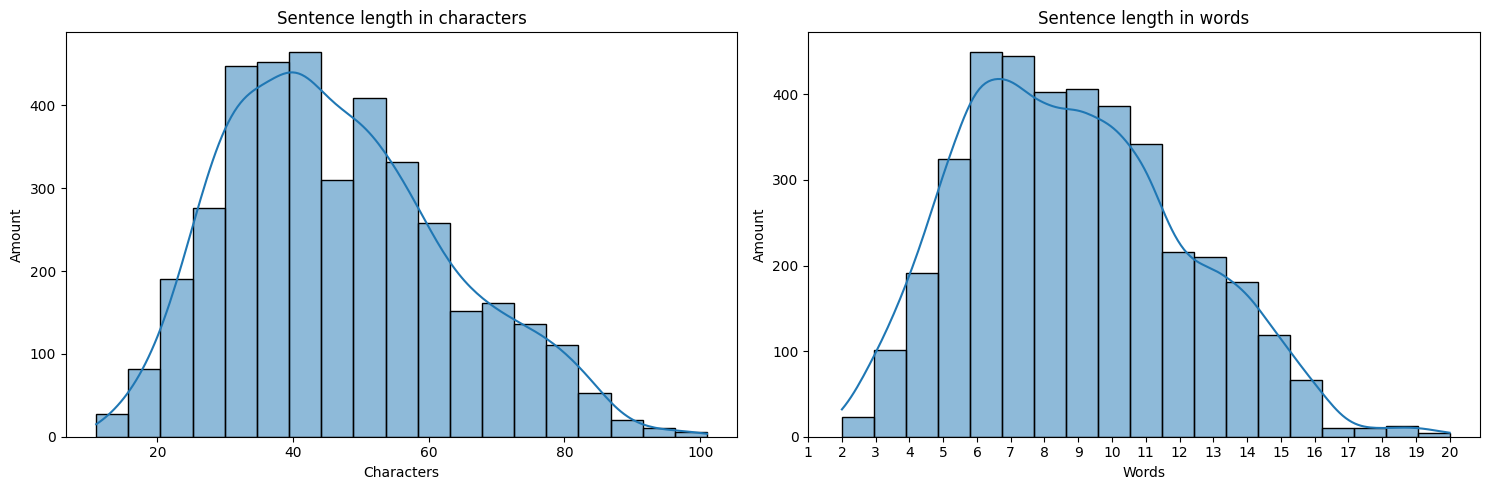

In [451]:
# Re-using more code from labb 2
texts = df["text"]
character_length = character_counter_for_sentences(texts)
word_length = word_counter_for_sentences(texts)

df["character_amount"] = character_length
df["word_amount"] = word_length

length_words_and_characters_histplot(df, bin=19)
df.drop(columns=['character_amount', 'word_amount'], axis=1, inplace=True)

### Identity Categories

In [452]:
df["identity"].unique()

array(['women', 'trans people', 'gay people', 'black people',
       'disabled people', 'Muslims', 'immigrants', 'none'], dtype=object)

### Null Values in DF

In [453]:
df.isnull().sum()

text        0
label       0
identity    0
dtype: int64

In [454]:
pd.reset_option('display.max_rows')
df[df["identity"].isnull()]

,text,label,identity


### Identity Distribution

In [455]:
df["identity"].value_counts()

gay people         577
women              535
disabled people    510
Muslims            510
black people       504
trans people       485
immigrants         485
none               295
Name: identity, dtype: int64

### Label Distribution

In [456]:
df["label"].value_counts()

hateful        2659
non-hateful    1242
Name: label, dtype: int64


#TODO data augmentation for label, keep in mind that identity column must still be balanced after label has had data augmented and added.



##### Must change all words with numbers in them because it'll most likely affect the sentiment analysis negatively otherwise, we'll receive inaccurate polarity and subjectivety scores.

### Changes numbers into letters

In [457]:
# prints all rows with a word with number in them
words_with_numbers_validation = df["text"][df["text"].str.contains(r'\d')].index
words_with_numbers = df["text"][df["text"].str.contains(r'\d')]
# split each row into a list of words
words_with_numbers = words_with_numbers.str.split()

print(words_with_numbers)

# find all words that contain a number in each list
word_with_number_list = []

for word_list in words_with_numbers: # loops through list och list
    for word in word_list: # loops through elements in each list
        if any(char.isdigit() for char in word):
            word_with_number_list.append(word)

        # only keep unique words in list
        word_with_number_list_unique = np.unique(word_with_number_list)
        word_with_number_list_unique = word_with_number_list_unique.tolist()

2811               [Its, disheartening, to, still, see, people, call, for, the, death, of, women, in, 2020]
2812       [Its, disheartening, to, still, see, people, call, for, the, death, of, trans, people, in, 2020]
2813         [Its, disheartening, to, still, see, people, call, for, the, death, of, gay, people, in, 2020]
2814       [Its, disheartening, to, still, see, people, call, for, the, death, of, black, people, in, 2020]
2815    [Its, disheartening, to, still, see, people, call, for, the, death, of, disabled, people, in, 2020]
                                                       ...                                                 
3896                                                            [Gay, people, are, all, complete, 4ssholes]
3897                                                          [Black, people, are, all, complete, 4ssholes]
3898                                                       [Disabled, people, are, all, complete, 4ssholes]
3899                        

In [458]:
number_to_letter_dict = {
    "1": "i",
    "3": "e",
    "4": "a",
    "7": "t",
    "0": "o"
}

#loops though dictionary and replaces misspelled words in "text" column
for number_str, letter in number_to_letter_dict.items():
    no_conseq_ints = ~df['text'].str.contains(r'\d{4}') # skips strings that are 4 consequtive ints (for '2020')

    df["text"].loc[no_conseq_ints] = df["text"].loc[no_conseq_ints].str.replace(number_str, letter, regex=False)

#saved rows that were misspelled, so i can find them again after applying change
df["text"].loc[words_with_numbers_validation]

2811              Its disheartening to still see people call for the death of women in 2020 
2812       Its disheartening to still see people call for the death of trans people in 2020 
2813         Its disheartening to still see people call for the death of gay people in 2020 
2814       Its disheartening to still see people call for the death of black people in 2020 
2815    Its disheartening to still see people call for the death of disabled people in 2020 
                                                ...                                         
3896                                                   Gay people are all complete assholes 
3897                                                 Black people are all complete assholes 
3898                                              Disabled people are all complete assholes 
3899                                                      Muslims are all complete assholes 
3900                                                   Immigrants are 

### Finds words that are spaced inbetween each letter:´
- EX: "I really l i k e icecream"

In [459]:
# finds words that are written with single letters and has spaces inbetween each letter in that word
# ex: "I really l i k e icecream"
pattern = r'(\b(?:[a-zA-Z] ){2,}[a-zA-Z]\b)'

filtered_rows = df[df["text"].str.contains(pattern, regex=True)]

# removes these rows because it was to difficult to change it back to normal
df.drop(filtered_rows.index, inplace=True)

C:\Users\Danne\AppData\Local\Temp\ipykernel_8664\929293293.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_rows = df[df["text"].str.contains(pattern, regex=True)]


## Emotion frequency in hateful vs non-hateful texts
Check how many rows that are hateful fall under a certain emotion(s) and vice versa

In [460]:
grouped_data = df.groupby(['label', 'identity'], axis=0).size()
identity_label_count = grouped_data.unstack(fill_value=0) # creates a dataframe with the grouped data

In [461]:
identity_label_count

identity,Muslims,black people,disabled people,gay people,immigrants,none,trans people,women
label,,,,,,,,
hateful,362,346,362,362,346,0,346,362
non-hateful,122,135,122,189,116,295,116,147


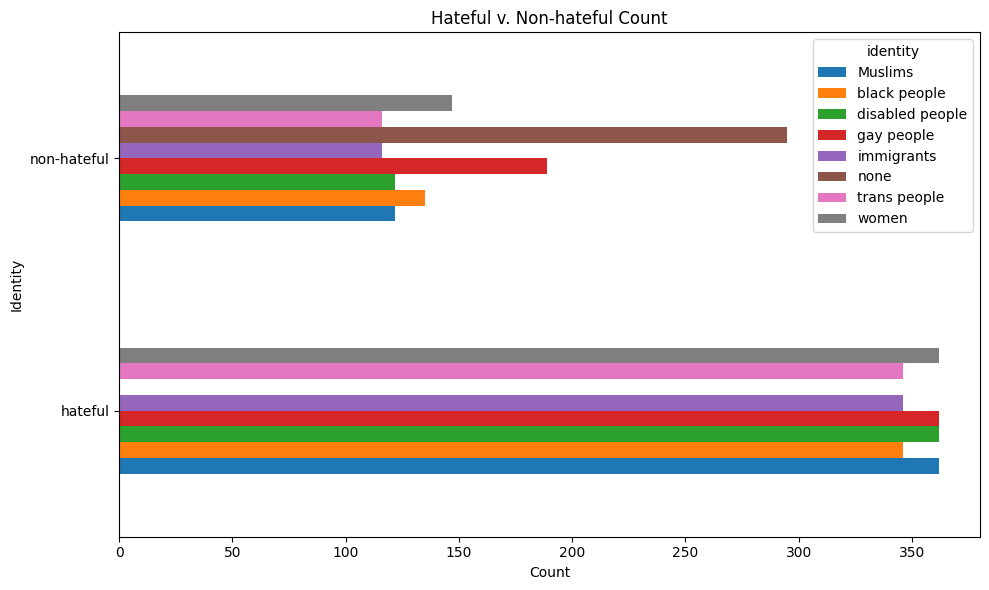

In [462]:
# for lopp that loops through each identity and plots two bars, one for hateful and one for non-hateful

fig, ax = plt.subplots(figsize=(10, 6))

identity_label_count.plot(kind='barh', ax=ax)

ax.set_xlabel('Count')
ax.set_ylabel('Identity')
ax.set_title('Hateful v. Non-hateful Count')

plt.tight_layout()
plt.show()


### Sentiment Analysis

In [463]:
from textblob import TextBlob
df_texts = df["text"]

for text in df_texts:
    blob = TextBlob(text)
    print(f"Text: {text}, Polarity: {blob.sentiment.polarity}, Subjectivity: {blob.sentiment.subjectivity}")

Text: I hate women , Polarity: -0.8, Subjectivity: 0.9
Text: I hate trans people , Polarity: -0.8, Subjectivity: 0.9
Text: I hate gay people , Polarity: -0.19166666666666668, Subjectivity: 0.7416666666666667
Text: I hate black people , Polarity: -0.48333333333333334, Subjectivity: 0.6666666666666667
Text: I hate disabled people , Polarity: -0.5, Subjectivity: 0.6
Text: I hate Muslims , Polarity: -0.8, Subjectivity: 0.9
Text: I hate immigrants , Polarity: -0.8, Subjectivity: 0.9
Text: I really cant stand women like you , Polarity: 0.2, Subjectivity: 0.2
Text: I really cant stand trans people like you , Polarity: 0.2, Subjectivity: 0.2
Text: I really cant stand gay people like you , Polarity: 0.30833333333333335, Subjectivity: 0.3916666666666667
Text: I really cant stand black people like you , Polarity: 0.016666666666666677, Subjectivity: 0.31666666666666665
Text: I really cant stand disabled people like you , Polarity: 0.0, Subjectivity: 0.25
Text: I really cant stand Muslims like you 

### Sentiment Analysis Evaluation:
Thinking that changing all numbers to letters in the words that were affected seemed to do nothing. I still think that the scoring is very off and sentences that are seemingly just as negative score differently. In other words: I can't use this information for anything useful.

## Stopwords Removal

In [464]:
nltk_stopwords = stopwords.words("english")  # set language stopwords

def remove_stopwords_from_df(df: DataFrame) -> str:
    words = df.split()  # only sentences - split makes each row list of words
    filtered_words = [
        word for word in words if word.lower() not in nltk_stopwords
    ]  # keep words that arent in stopword list
    filtered_sentence = " ".join(filtered_words)  # list -> string again
    return filtered_sentence


df["text"] = df["text"].apply(
    remove_stopwords_from_df
)  # each replaced with filtered sentence

## Label Encoding

In [465]:
df["identity_encoding"] = df["identity"].astype("category").cat.codes
df["label_encoding"] = df["label"].astype("category").cat.codes

df_unique_encodings = df.drop_duplicates(["identity", "identity_encoding"])
df_unique_encodings = df_unique_encodings.drop(columns=["text", "label"])
df_unique_encodings.sort_values(by=["identity_encoding"])

,identity,identity_encoding,label_encoding
5,Muslims,0,0
3,black people,1,0
4,disabled people,2,0
2,gay people,3,0
6,immigrants,4,0
1271,none,5,1
1,trans people,6,0
0,women,7,0


## Lemmatization

In [466]:
# uses a dictionary and module to apply lemmatization to the text column in the dataset
# it means that its converting words to their base form
nltk.download("wordnet")
nltk.download("punkt")

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # tokenizes and the lemmatises
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['text'] = df['text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Danne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Danne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data split, tokenization & padding

In [467]:
def model_data_split(feature, target):
    X, y = feature, target

    # train test validation split 70/15/15
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.1765, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = model_data_split(df["text"], df["label_encoding"])

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(2608,) (560,) (560,)
(2608,) (560,) (560,)


## Data augmentation after data split

In [468]:
# creates function to be able to use it for both models
def data_augmentation_translate(X_train, y_training, X_column, y_column):
    train_df = pd.DataFrame({'text': X_train, 'label': y_training})

    # uses google translate api to translate text to korean and back to english
    translator = Translator()
    int_list = []

    # adds 50 new rows to dataframe
    # works more as a proof of concept since this api in unfortunately slow and tends to time out
    # this solution is not perfect, and in the future I'd look into other api's, because i actually like this solution
    for i in range(20): 
        while True:
            rand_index = random.randint(0, len(train_df) - 1) # selects random row
            if rand_index not in int_list: # makes sure that the same row isnt selected twice
                break

        int_list.append(rand_index)

        # extracts relevant columns from the randomly selected row
        rand_string = train_df[X_column].iloc[rand_index]
        label = train_df[y_column].iloc[rand_index]

        # translates from english to korean and then back to english
        print(f"Original text: {rand_string} Row: {rand_index} Count: {i}")

        translator_text_test = translator.translate(rand_string, dest='ko').text
        translator_text_test = translator.translate(translator_text_test, dest='en').text

        print(f"Translated back: {translator_text_test}\n")

        # adds rows to new dataframe, which is then concatenated with the original dataframe
        new_row = {'text': translator_text_test, 'label': label}
        new_row_df = pd.DataFrame([new_row])
        train_df = pd.concat([train_df, new_row_df], ignore_index=True)

    y_train = train_df['label'].values
    return train_df, y_train

train_df, y_train = data_augmentation_translate(X_train, y_train, "text", "label")

Original text: Never trust single word said gay person Row: 899 Count: 0


Translated back: Do not believe in a word that a gay man says

Original text: Lets eradicate weed Row: 1615 Count: 1
Translated back: Let's eradicate weeds

Original text: Muslims disgust much Row: 310 Count: 2
Translated back: Muslims are having a lot of disgust

Original text: get rid woman Row: 2451 Count: 3
Translated back: Revive the woman

Original text: dont get rid woman Row: 2580 Count: 4
Translated back: Do not get rid of a woman

Original text: Typical Jihadi behaviour Row: 1889 Count: 5
Translated back: Typical underground Di behavior

Original text: Women like deserve todie Row: 2563 Count: 6
Translated back: A woman deserves to die

Original text: therapist gay person Row: 176 Count: 7
Translated back: Therapist

Original text: kind gay people ought execuetd Row: 1118 Count: 8
Translated back: Friendly gay people must execuetd

Original text: black people country pissing much Row: 1939 Count: 9
Translated back: There are a lot of black countries

Original text: wont talk 

## Tokenization & Padding

In [469]:
# counts how many words there are in dataset - for setting vocab_size
words = list(itertools.chain(*[sentence.split() for sentence in df["text"]]))
word_counts = Counter(words)

len(word_counts)

1206

In [470]:
# creates function to be able to use it for both models
def tokenization_and_padding(
        vocab_size=2000, # higher if more data is added
        embedding_dim=50,
        max_length=40, # longer than longest sentence, this if more data is added
        padding_type="post",
        trunc_type="post",
        train_data=None,
        X_val=X_val,
        X_test=X_test
):
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(train_data)

    X_train_sequences = tokenizer.texts_to_sequences(train_data)
    X_val_sequences = tokenizer.texts_to_sequences(X_val)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)

    X_train_padded = pad_sequences(
        X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type
    )
    X_val_padded = pad_sequences(
        X_val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type
    )
    X_test_padded = pad_sequences(
        X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type
    )

    return X_train_padded, X_val_padded, X_test_padded, embedding_dim, vocab_size, max_length

# uses train dataset with data augmentation
X_train_padded, X_val_padded, X_test_padded, embedding_dim, vocab_size, max_length = tokenization_and_padding(
    train_data=train_df['text'], X_val=X_val, X_test=X_test
)


## First model creation (Binary Classification)

In [471]:
# i ran hyperband on hyperparameters which i haven't done too much before.
# i.e testing embedding dimensions, conv AF, LSTM AF, Dense AF.
def build_binary_model(hp):
    vocab_size = 2000
    embedding_dim = hp.Int('embedding_dim', min_value=100, max_value=200, step=100)
    max_length = 40

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(filters=hp.Int('conv_filters', 32, 64, step=32), 
                     kernel_size=5, 
                     activation=hp.Choice('conv_activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(MaxPool1D(5))
    model.add(LSTM(hp.Int('lstm_units', 128, 256, step=128), activation=hp.Choice('lstm_activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(Dropout(0.35))
    model.add(Dense(hp.Int('dense_units', 128, 256, step=128), activation=hp.Choice('dense_activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(Dropout(0.35))
    model.add(Dense(1, activation="sigmoid"))

    # different loss function that works well for binary, but not for multiclass
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# same setup pretty much as I used in CNN labb
tuner = kt.Hyperband(
    build_binary_model,
    objective='val_accuracy',
    max_epochs=5,  
    hyperband_iterations=1,
    directory='hyperband',
    project_name='binary_classification'
)

tuner.search(X_train_padded, y_train, epochs=10, validation_data=(X_val_padded, y_val))

binary_model = tuner.get_best_models(num_models=1)[0]

# to be able to re-run model and get an accurate plot for train and val
best_hps = tuner.get_best_hyperparameters()[0]
binary_model = build_binary_model(best_hps)

Reloading Tuner from hyperband\binary_classification\tuner0.json


In [472]:
binary_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 200)           400000    
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 96)            96096     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 96)             0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 256)               361472    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 384)               98688     
                                                      

In [473]:
# makes sure shape is correct
print("X_train_padded shape:", X_train_padded.shape)
print("y_train shape:", y_train.shape)
print("X_val_padded shape:", X_val_padded.shape)
print("y_val shape:", y_val.shape)
print("X_test_padded shape:", X_test_padded.shape)
print("y_test shape:", y_test.shape)

X_train_padded shape: (2628, 40)
y_train shape: (2628,)
X_val_padded shape: (560, 40)
y_val shape: (560,)
X_test_padded shape: (560, 40)
y_test shape: (560,)


Epoch 1/10


83/83 [==============================] - 4s 24ms/step - loss: 0.5938 - accuracy: 0.6990 - val_loss: 0.3633 - val_accuracy: 0.8446
Epoch 2/10
83/83 [==============================] - 2s 19ms/step - loss: 0.1632 - accuracy: 0.9372 - val_loss: 0.1363 - val_accuracy: 0.9518
Epoch 3/10
83/83 [==============================] - 2s 19ms/step - loss: 0.0275 - accuracy: 0.9897 - val_loss: 0.2099 - val_accuracy: 0.9589
Epoch 3: early stopping


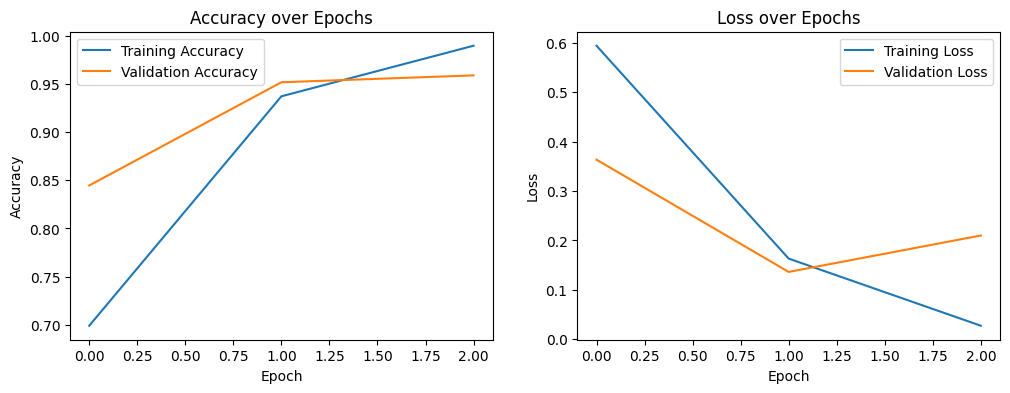

18/18 [==============================] - 0s 6ms/step


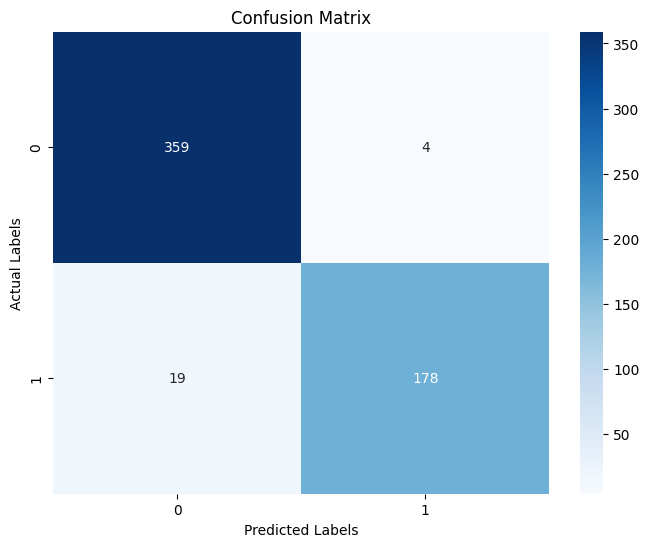

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       363
           1       0.98      0.90      0.94       197

    accuracy                           0.96       560
   macro avg       0.96      0.95      0.95       560
weighted avg       0.96      0.96      0.96       560

18/18 [==============================] - 0s 6ms/step - loss: 0.1653 - accuracy: 0.9589
**Parameters:** 
- Val Accuracy: 0.9589
- Test Accuracy: 0.9589
- Val Loss: 0.2099
- Test Loss: 0.1653


In [474]:
# fit and plot which can be used for both models
def model_fit_and_plot_val_train(
    model,
    epochs = 10,
    binary_model = True,
    es = True,
    X_train_padded = X_train_padded,
    y_train = y_train,
    X_val_padded = X_val_padded,
    y_val = y_val

):
    epochs = epochs
    # easily switch between early stopping or not
    if es == True:
        early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1) # verbose print epoch stop number
        history = model.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_val_padded, y_val), callbacks=[early_stopping])
    else:
        history = model.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_val_padded, y_val))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    # confusion matrix
    # needs to be different wheter its binary or multiclass
    if binary_model == True:
        y_pred = model.predict(X_test_padded)
        y_pred = (y_pred > 0.5).astype("int32") # chooses 0 or 1 depending on if its above or below 0.5 (because output is probability)
    else:
        y_pred = model.predict(X_test_padded) # float values
        y_pred = np.argmax(y_pred, axis=1) # again, probability, so we choose the highest probability (int value)


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    print(classification_report(y_test, y_pred))

    test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
    val_loss, val_accuracy = history.history['val_loss'][-1], history.history['val_accuracy'][-1]

    print("**Parameters:** ")
    print(f"- Val Accuracy: {val_accuracy:.4f}")
    print(f"- Test Accuracy: {test_accuracy:.4f}")
    print(f"- Val Loss: {val_loss:.4f}")
    print(f"- Test Loss: {test_loss:.4f}")

model_fit_and_plot_val_train(model=binary_model, epochs=10, es=True)

In [475]:
# prediction on first model
binary_predictions = binary_model.predict(X_test_padded)
# if probability of a hateful text is greater than 50% then it's hateful
# creates a list of 1's and 0's for each text (reverse because hateful is 0)
binary_predictions = (binary_predictions > 0.5).astype("int32")
# extracts the hateful texts from X_test_padded
hateful_texts_padded = X_test_padded[binary_predictions.flatten() == 0]

10/18 [===============>..............] - ETA: 0s

18/18 [==============================] - 0s 6ms/step


In [476]:
X_train, X_val, X_test, y_train, y_val, y_test = model_data_split(df["text"], df["identity_encoding"])
print(y_train)
train_df, y_train = data_augmentation_translate(X_train, y_train, "text", "label")

X_train_padded, X_val_padded, X_test_padded, embedding_dim, vocab_size, max_length = tokenization_and_padding(
    train_data=train_df['text'], X_val=X_val, X_test=X_test
)

2481    2
1902    4
2889    1
2228    1
2112    4
       ..
3003    5
986     7
2431    1
3820    6
3343    1
Name: identity_encoding, Length: 2608, dtype: int8
Original text: half participant Muslims Row: 998 Count: 0


Translated back: Half participant Muslim

Original text: Immigrants complete asshole Row: 1612 Count: 1
Translated back: Immigrants complete the idiot

Original text: Statements like immigrant scum deeply hurtful Row: 2085 Count: 2
Translated back: Statements such as immigrant waste are severely injured.

Original text: want kill immigrant Row: 62 Count: 3
Translated back: I want to kill immigrants

Original text: wish could date immigrant Row: 550 Count: 4
Translated back: Wish can be dated with immigrants

Original text: would never lift finger save trans person life Row: 507 Count: 5
Translated back: I will never lift my fingers

Original text: Typical queer behaviour Row: 1207 Count: 6
Translated back: Typical queer behavior

Original text: opinion woman worthless dirt Row: 2068 Count: 7
Translated back: Opinion woman useless soil

Original text: retard Row: 129 Count: 8
Translated back: retard

Original text: Disabled people like justpathetic Row: 1535 Count: 9
Translated back: Pe

In [477]:
def build_identity_model(hp):
    vocab_size = 2000
    embedding_dim = hp.Int('embedding_dim', min_value=100, max_value=200, step=100)
    max_length = 40

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(filters=hp.Int('conv_filters', 32, 64, step=32),
                     kernel_size=5,
                     activation=hp.Choice('conv_activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(MaxPool1D(5))
    model.add(LSTM(hp.Int('lstm_units', 128, 256, step=128), 
                   activation=hp.Choice('lstm_activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(Dropout(0.35))
    model.add(Dense(hp.Int('dense_units', 128, 256, step=128), 
                    activation=hp.Choice('dense_activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(Dropout(0.35))
    model.add(Dense(8, activation="softmax"))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up Hyperband tuner for identity classification model
tuner_identity = kt.Hyperband(
    build_identity_model,
    objective='val_accuracy',
    max_epochs=5,  # Adjusted to match the binary model
    hyperband_iterations=1,  # Adjusted to match the binary model
    directory='hyperband',
    project_name='identity_classification'
)

# Start the hyperparameter search
tuner_identity.search(X_train_padded, y_train, epochs=10, validation_data=(X_val_padded, y_val))

# After the search, retrieve the best model
identity_classification_model = tuner_identity.get_best_models(num_models=1)[0]

best_hps = tuner_identity.get_best_hyperparameters()[0]
identity_classification_model = build_identity_model(best_hps)


Reloading Tuner from hyperband\identity_classification\tuner0.json


In [478]:
identity_classification_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 200)           400000    
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 32)            32032     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 256)               295936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                      

Epoch 1/10


83/83 [==============================] - 4s 22ms/step - loss: 1.9977 - accuracy: 0.1769 - val_loss: 1.4434 - val_accuracy: 0.3482
Epoch 2/10
83/83 [==============================] - 1s 15ms/step - loss: 0.6249 - accuracy: 0.7549 - val_loss: 0.2217 - val_accuracy: 0.9482
Epoch 3/10
83/83 [==============================] - 1s 16ms/step - loss: 0.1741 - accuracy: 0.9532 - val_loss: 0.1170 - val_accuracy: 0.9643
Epoch 4/10
83/83 [==============================] - 1s 15ms/step - loss: 0.0634 - accuracy: 0.9806 - val_loss: 0.1074 - val_accuracy: 0.9732
Epoch 5/10
83/83 [==============================] - 1s 15ms/step - loss: 0.0647 - accuracy: 0.9836 - val_loss: 0.1589 - val_accuracy: 0.9696
Epoch 5: early stopping


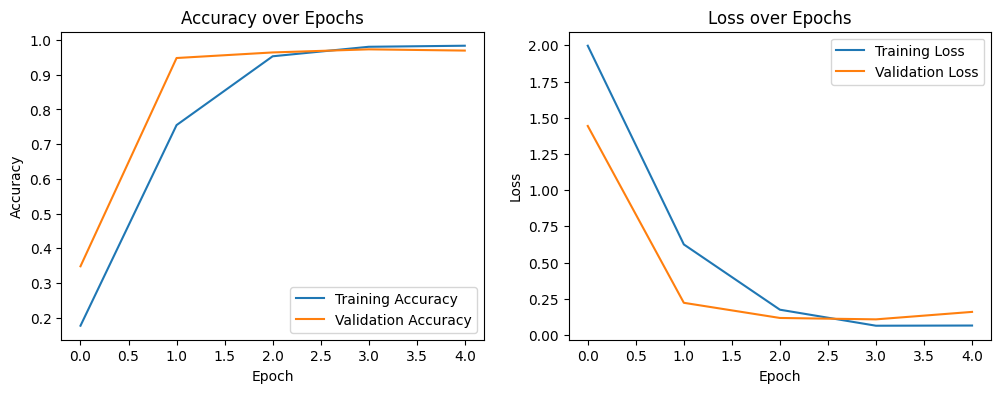

18/18 [==============================] - 0s 5ms/step


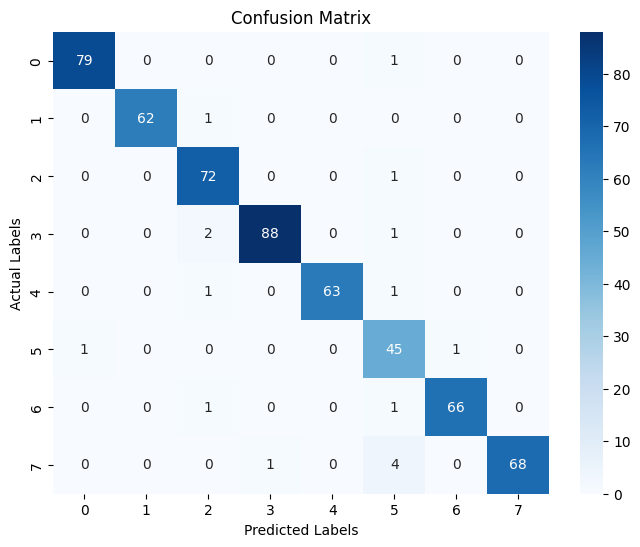

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       1.00      0.98      0.99        63
           2       0.94      0.99      0.96        73
           3       0.99      0.97      0.98        91
           4       1.00      0.97      0.98        65
           5       0.83      0.96      0.89        47
           6       0.99      0.97      0.98        68
           7       1.00      0.93      0.96        73

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560

18/18 [==============================] - 0s 6ms/step - loss: 0.1543 - accuracy: 0.9696
**Parameters:** 
- Val Accuracy: 0.9696
- Test Accuracy: 0.9696
- Val Loss: 0.1589
- Test Loss: 0.1543


In [479]:
model_fit_and_plot_val_train(model=identity_classification_model, binary_model=False, epochs=10, es=True, X_train_padded=X_train_padded, y_train=y_train, X_val_padded=X_val_padded, y_val=y_val)

In [480]:
# identity predictions on the second model with the hateful texts extracted from the first model
identity_predictions = identity_classification_model.predict(hateful_texts_padded)

# finds the classes with highest probability (most likely) and selects them as the prediction
identity_predictions = np.argmax(identity_predictions, axis=1)

12/12 [==============================] - 0s 6ms/step


In [481]:
# get the correct labels from test set for the hateful texts
true_identity_labels = y_test[binary_predictions.flatten() == 0]

# prints final results for the identity classification model
print(classification_report(true_identity_labels, identity_predictions))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73        56
           1       0.97      0.70      0.82        44
           2       0.78      0.82      0.80        57
           3       0.00      0.00      0.00        58
           4       0.96      0.81      0.88        54
           5       0.18      0.85      0.30        13
           6       0.03      0.04      0.04        45
           7       0.11      0.04      0.06        51

    accuracy                           0.47       378
   macro avg       0.47      0.50      0.45       378
weighted avg       0.50      0.47      0.47       378



### Manually checks the predictions of both models

In [482]:
# first model predictions
binary_predictions_full = binary_model.predict(X_test_padded)
binary_predictions_full = (binary_predictions_full > 0.5).astype("int32")

# extract pre-padded hateful texts from test
hateful_texts_padded_full = X_test_padded[binary_predictions_full.flatten() == 0]
hateful_texts_original = X_test[binary_predictions_full.flatten() == 0]

# second model predictions
identity_predictions_full = identity_classification_model.predict(hateful_texts_padded_full)
identity_predictions_full = np.argmax(identity_predictions_full, axis=1)
# labels from test data for the hateful texts
true_identity_labels_full = y_test[binary_predictions_full.flatten() == 0]

# creates df for simple printing of results
df_predictions_results = pd.DataFrame({
    'Original_Text': hateful_texts_original,
    'Predicted_Identity': identity_predictions_full,
    'Actual_Identity': true_identity_labels_full
})

# prints out original text, with the predicted identity and the actual identity
print(df_predictions_results.sample(10))


18/18 [==============================] - 0s 6ms/step


12/12 [==============================] - 0s 5ms/step
                                                  Original_Text  \
501                                 Disabled people locked cage   
12                               really cant stand Muslims like   
393                                         Trans people cancer   
2355                                       love disabled people   
2233                                     colleague trans person   
1611                             simply shoot Theyre gay people   
2898  Muslim life might worth shit luckily opinion doesnt count   
3859                                   Typical nigger behaviour   
1632                    surprised idea bullshit came gay person   
2464                             Trans people belong government   

      Predicted_Identity  Actual_Identity  
501                    2                2  
12                     0                0  
393                    6                6  
2355                   2         